In [0]:
# https://www.tensorflow.org/install
!pip install tensorflow==2.0.0-alpha0 

In [3]:
import numpy as np
import tensorflow as tf
print("Tensorflow:", tf.__version__)

Tensorflow: 2.0.0-alpha0


In [16]:
# https://www.tensorflow.org/overview
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


5


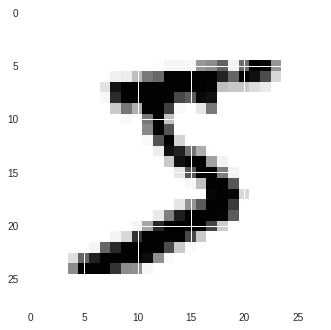

In [18]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print(y_train[0])

In [0]:
x_train = x_train / 255.0 
x_test = x_test / 255.0

In [20]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=50, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 63us/sample - loss: 0.2835 - accuracy: 0.9202
Epoch 2/5
60000/60000 [==============================] - 4s 59us/sample - loss: 0.1236 - accuracy: 0.9641
Epoch 3/5
60000/60000 [==============================] - 3s 58us/sample - loss: 0.0872 - accuracy: 0.9743
Epoch 4/5
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0651 - accuracy: 0.9806
Epoch 5/5
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0519 - accuracy: 0.9842


In [21]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 43us/sample - loss: 0.0808 - accuracy: 0.9747


[0.08076499402970076, 0.9747]

In [23]:
np.argmax(model(x_train[:1]))

5

In [0]:
# https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/Model
class MyModel(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.flat = tf.keras.layers.Flatten(input_shape=(28, 28))
        self.dense1 = tf.keras.layers.Dense(128, activation=tf.nn.relu)
        self.dense2 = tf.keras.layers.Dense(10, activation=tf.nn.softmax)
        
        # https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/losses/SparseCategoricalCrossentropy
        self.loss = tf.keras.losses.SparseCategoricalCrossentropy()
        # https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/metrics/Accuracy
        self.accuracy = tf.keras.metrics.Accuracy()
        # https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/optimizers/Adam
        self.optimizer = tf.optimizers.Adam()

    def call(self, inputs):
        flat = self.flat(inputs)
        dense1 = self.dense1(flat)
        return self.dense2(dense1)
    
    def get_loss(self, inputs, expected):
        return self.loss(expected, self(inputs))
    
    def get_accuracy(self, inputs, expected):
        return self.accuracy(expected, tf.argmax(self(inputs), axis=1))
    
    def optimize(self, inputs, expected):
        loss = lambda: self.get_loss(inputs, expected)
        self.optimizer.minimize(loss=loss, var_list=self.trainable_weights)
        
    def fit(self, x, y, batch_size, epochs):
        num_samples = x.shape[0]
        for ep in range(epochs):
            for i_start in range(0, num_samples, batch_size):
                x_batch = x[i_start : i_start+batch_size]
                y_batch = y[i_start : i_start+batch_size]
                self.optimize(x_batch, y_batch)
            loss = self.get_loss(x,y)
            acc = self.get_accuracy(x,y)
            print("Epoch: {}, loss: {}, accuracy: {}".format(ep, loss, acc))

In [25]:
my_model = MyModel()
my_model.fit(x_train, y_train, batch_size=50, epochs=5)

Epoch: 0, loss: 0.17014266550540924, accuracy: 0.9492999911308289
Epoch: 1, loss: 0.11693110316991806, accuracy: 0.9563249945640564
Epoch: 2, loss: 0.08534319698810577, accuracy: 0.9618499875068665
Epoch: 3, loss: 0.07103550434112549, accuracy: 0.9656083583831787
Epoch: 4, loss: 0.0587860606610775, accuracy: 0.9685999751091003


In [26]:
np.argmax(my_model(x_train[:1]))

5

In [5]:
a = tf.Variable(4.0)
print(a.numpy())

4.0


In [6]:
def f(x):
    return a * x
print(f(5))

tf.Tensor(20.0, shape=(), dtype=float32)


In [13]:
loss = lambda: abs(f(5) - 5)
print(loss)

<function <lambda> at 0x7fe07b932268>


In [15]:
optimizer = tf.optimizers.Adam(learning_rate=1)
for _ in range(10):
    optimizer.minimize(loss, var_list=[a])
    print(a.numpy(), f(5))

2.0000014 tf.Tensor(10.000008, shape=(), dtype=float32)
1.0000052 tf.Tensor(5.000026, shape=(), dtype=float32)
2.7418137e-06 tf.Tensor(1.3709068e-05, shape=(), dtype=float32)
-0.41843143 tf.Tensor(-2.0921571, shape=(), dtype=float32)
-0.4904929 tf.Tensor(-2.4524646, shape=(), dtype=float32)
-0.33375463 tf.Tensor(-1.6687732, shape=(), dtype=float32)
-0.015380621 tf.Tensor(-0.076903105, shape=(), dtype=float32)
0.42267495 tf.Tensor(2.1133747, shape=(), dtype=float32)
0.95246416 tf.Tensor(4.762321, shape=(), dtype=float32)
1.5544472 tf.Tensor(7.772236, shape=(), dtype=float32)
